In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
initial_dataframe = pd.read_excel('concrete-data/Concrete_Data.xls')
initial_dataframe

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
initial_dataframe.describe(include='all')
initial_dataframe.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [4]:
# Normalizing data

standardized_dataframe = pd.DataFrame()

standardized_dataframe['Cement (component 1)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Cement (component 1)(kg in a m^3 mixture)'])
standardized_dataframe['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'])
standardized_dataframe['Fly Ash (component 3)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Fly Ash (component 3)(kg in a m^3 mixture)'])
standardized_dataframe['Water  (component 4)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Water  (component 4)(kg in a m^3 mixture)'])
standardized_dataframe['Superplasticizer (component 5)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Superplasticizer (component 5)(kg in a m^3 mixture)'])
standardized_dataframe['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])
standardized_dataframe['Fine Aggregate (component 7)(kg in a m^3 mixture)'] = stats.zscore(initial_dataframe['Fine Aggregate (component 7)(kg in a m^3 mixture)'])
standardized_dataframe['Age (day)'] = stats.zscore(initial_dataframe['Age (day)'])
standardized_dataframe['Concrete compressive strength(MPa, megapascals) '] = stats.zscore(initial_dataframe['Concrete compressive strength(MPa, megapascals) '])

standardized_dataframe

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733,-0.182649


In [5]:
# full profile of normalized_dataframe for reference
standardized_profile = ProfileReport(standardized_dataframe, title="Concrete Compressive Strength Report")
#standardized_profile

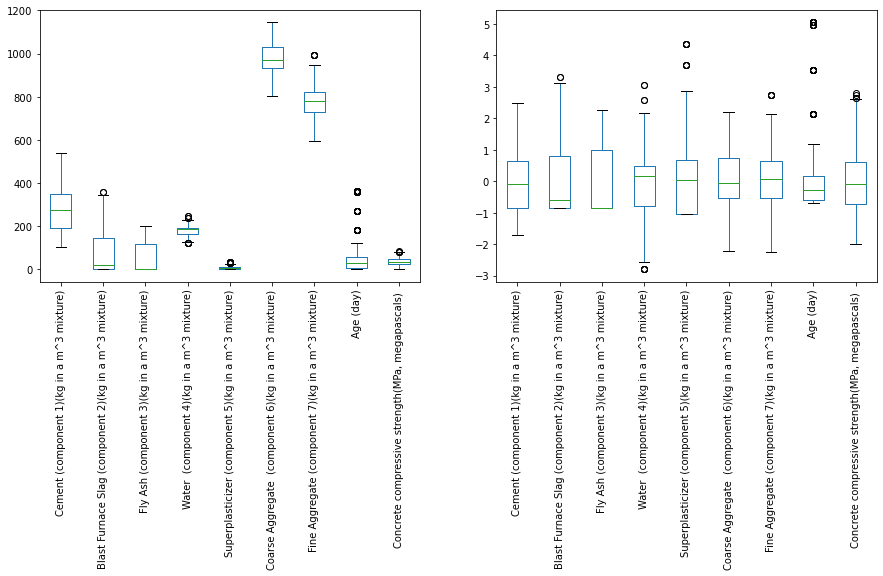

In [7]:
# Plotting initial vs normalized data to illustrate effect of pre-processing
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

initial_dataframe.boxplot(column =['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], grid = False, ax=axes[0], rot=90)
       
standardized_dataframe.boxplot(column =['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], grid = False, ax=axes[1], rot=90)
plt.show()

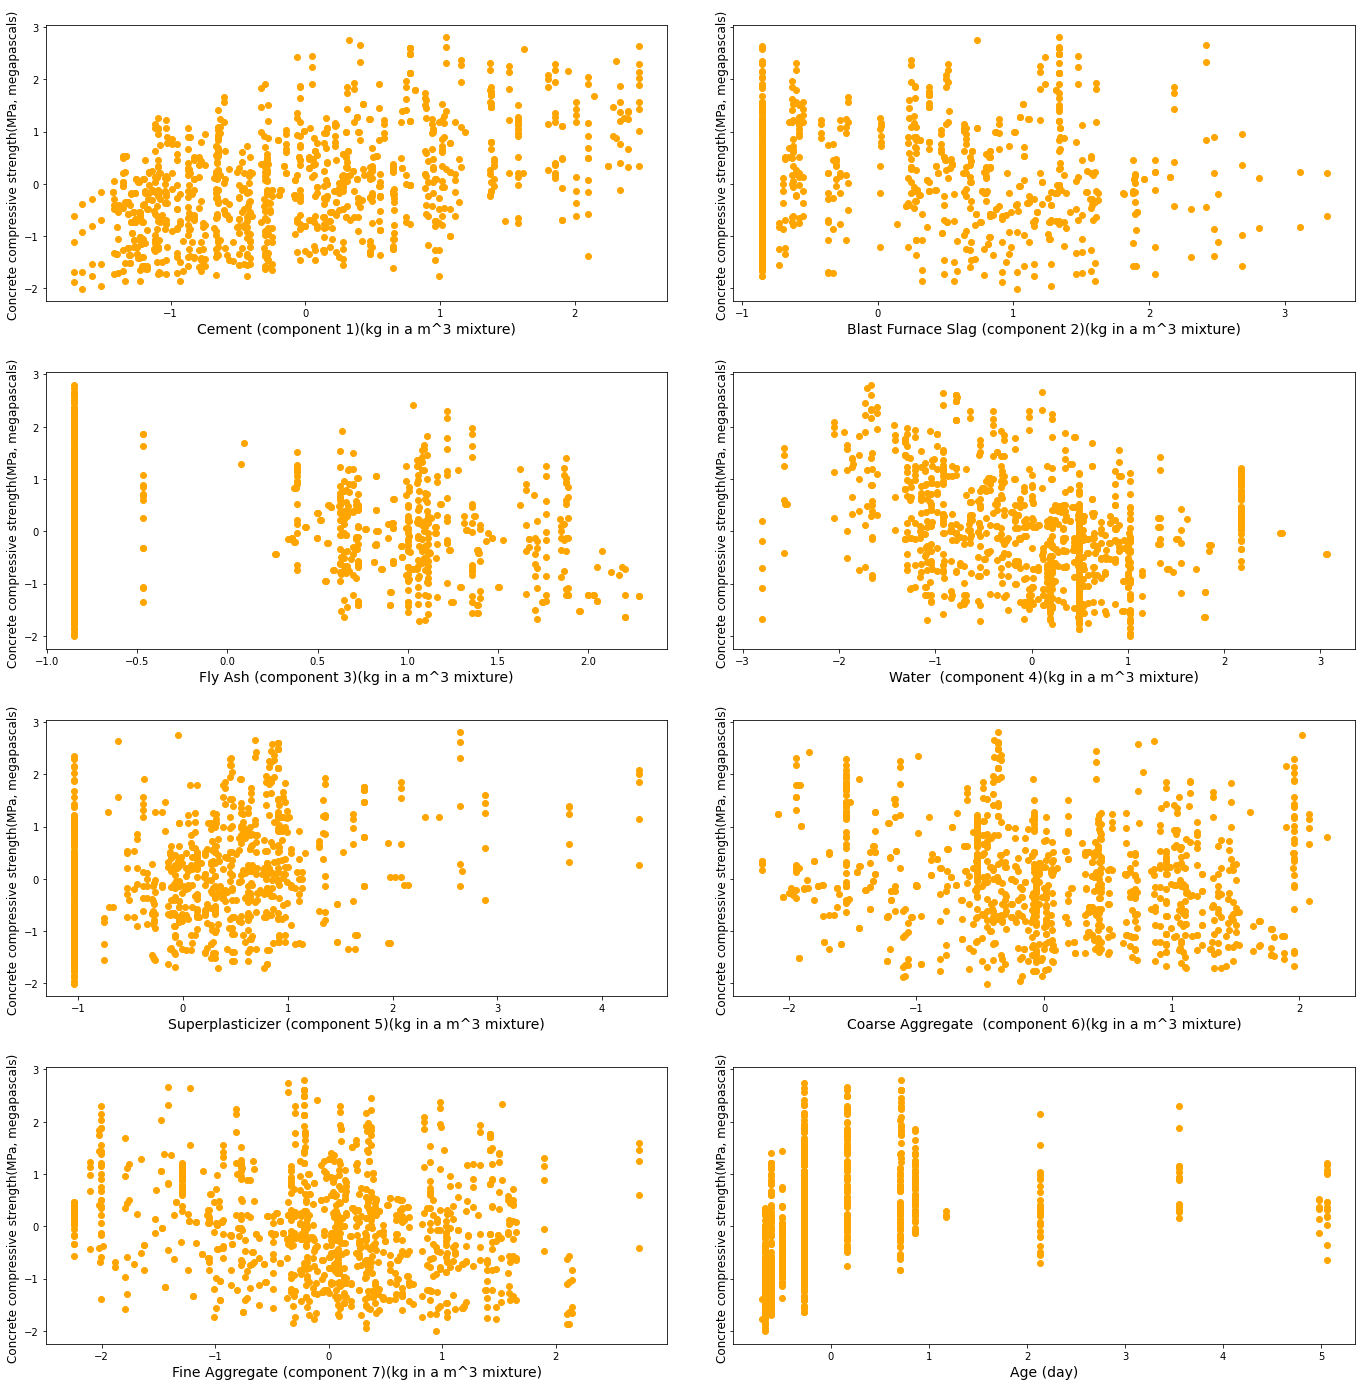

In [8]:
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(20,20))
fig.tight_layout(pad=5.0)

feature_list = standardized_dataframe.columns.values;
feature_index = 0

for i in range(4):
    for j in range(2):
        axes[i,j].scatter(standardized_dataframe[feature_list[feature_index]], standardized_dataframe[feature_list[8]], color='orange')
        axes[i,j].set_ylabel(feature_list[8], fontsize=12)
        axes[i,j].set_xlabel(feature_list[feature_index], fontsize=14)
        feature_index+=1

plt.show()

# Univariate Regression

### Functions

This function calculates the mean squared error (MSE) loss between the predicted labels and the actual labels.
It takes in two arguments: predicted_labels_column (a 1D array or column vector containing the predicted labels)
and actual_labels_column (a 1D array or column vector containing the actual labels).

In [9]:
def loss_function_mse(predicted_labels_column, actual_labels_column):
    squared_column = ((predicted_labels_column-actual_labels_column)**2)
    return (1/squared_column.shape[0])*squared_column.sum()

This function takes in three parameters: m, b, and feature_values_column. The m parameter represents the slope of the line that will be used to make predictions, the b parameter represents the y-intercept of the line, and the feature_values_column parameter represents a column of feature values that will be used to make predictions.

In [10]:
def univariate_prediction_values(m,b, feature_values_column):
    return m*feature_values_column + b

This function takes in five parameters: m_old, alpha, feature_values_column, actual_labels_column, and predicted_labels_column.
* The m_old parameter represents the previous value of the slope m, which will be updated by this function.
* The alpha parameter represents the learning rate, which controls the size of the step taken by the algorithm in each iteration. 
* The feature_values_column parameter represents a column of feature values used in training the model, while 
actual_labels_column represents the actual labels of the corresponding samples, and predicted_labels_column represents the predicted labels generated by the model.


In [11]:
def gradient_m(m_old, alpha, feature_values_column, actual_labels_column, predicted_labels_column):
    num_samples = 1/feature_values_column.shape[0]
    gradient = num_samples*((-2*feature_values_column*(predicted_labels_column-actual_labels_column)).sum())
    return m_old + alpha*gradient

This function takes in four parameters: b_old, alpha, actual_labels_column, and predicted_labels_column.
* The b_old parameter represents the previous value of the y-intercept b, which will be updated by this function. 
* The alpha parameter represents the learning rate, which controls the size of the step taken by the algorithm in each iteration. 
* The actual_labels_column parameter represents the actual labels of the corresponding samples, and predicted_labels_column represents the predicted labels generated by the model.


In [12]:
def gradient_b(b_old, alpha, actual_labels_column, predicted_labels_column):
    num_samples = 1/actual_labels_column.shape[0]
    gradient = num_samples*((-2*(predicted_labels_column-actual_labels_column)).sum())
    return b_old + alpha*gradient

The function calculates the R-squared value by first dividing the MSE by the variance of the actual labels.

In [13]:
def mse_to_rsquared(mse_value, actual_labels_column):
    return 1-(mse_value/actual_labels_column.var())


### Raw Data

Training/Test Split

In [14]:
train, test = train_test_split(initial_dataframe, test_size=0.3, random_state=42, shuffle=True)

In [19]:
# Set hyperparameters
max_num_steps = 10000
mse_threshold = 200
alpha = [0.00001, 0.000076,0.0000765, 0.000000000000001, 0.000000000000001, 0.000000000000001, 0.000000000000001, 0.000000000000001, 0.000000000000001]
m_init = 10
b_init = 2

m_b_list = []
feature_index = 0
prev_mse = 0

# Loop over each feature in the training dataset
for feature in train.columns:
    # Select the current feature and the target variable (actual labels)
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    
    # Perform gradient descent to update m_init and b_init
    for i in range(max_num_steps):
        predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
        
        # Evaluate mean squared error to check for convergence
        mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
        if mse_value < mse_threshold:
            break

        # Implement momentum adjustment to slow down the steps as we get closer to convergence
        if mse_value<=prev_mse:
            alpha[feature_index] = alpha[feature_index]*1.01
        else:
            alpha[feature_index] = alpha[feature_index]*0.5

        prev_mse = mse_value

        m_init = gradient_m(m_init, alpha[feature_index], feature_values_column, actual_labels_column, predicted_labels_column)
        b_init = gradient_b(b_init, alpha[feature_index], actual_labels_column, predicted_labels_column)

    feature_index += 1
        
    # Print the final values of m_init and b_init for the current feature
    print(feature_index, feature)
    # print("m:", m_init, "b:", b_init)
    m_b_list.append((m_init, b_init))

    # Evaluate the model on the training dataset
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)

    # Calculate the R-squared value for the model on the training dataset and print it
    r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
    # print("Training MSE: ",loss_function_mse(predicted_labels_column, actual_labels_column) )
    print("Training R-squared:", round(r_squared,4))

    
    # Evaluate the model on the test dataset
    feature_values_column = test[feature]
    actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
    
    # Calculate the R-squared value for the model on the test dataset and print it
    r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
    # print("Testing MSE: ",loss_function_mse(predicted_labels_column, actual_labels_column) )
    print("Testing R-squared:", round(r_squared, 4))
    print("")

1 Cement (component 1)(kg in a m^3 mixture)
Training R-squared: 0.184
Testing R-squared: 0.2203

2 Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Training R-squared: -0.3079
Testing R-squared: -0.2961

3 Fly Ash (component 3)(kg in a m^3 mixture)
Training R-squared: 0.006
Testing R-squared: 0.0014

4 Water  (component 4)(kg in a m^3 mixture)
Training R-squared: 0.0009
Testing R-squared: 0.0028

5 Superplasticizer (component 5)(kg in a m^3 mixture)
Training R-squared: 0.1433
Testing R-squared: 0.1121

6 Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Training R-squared: -0.0099
Testing R-squared: -0.0087

7 Fine Aggregate (component 7)(kg in a m^3 mixture)
Training R-squared: -0.0116
Testing R-squared: -0.0167

8 Age (day)
Training R-squared: 0.1083
Testing R-squared: 0.1093

9 Concrete compressive strength(MPa, megapascals) 
Training R-squared: 0.292
Testing R-squared: 0.2808



### Preprocessed Data

Training/Test Split

In [20]:
train, test = train_test_split(standardized_dataframe, test_size=0.2, random_state=42, shuffle=True)

In [21]:
# Set hyperparameters
max_num_steps = 1000
mse_threshold = 0.1
alpha = [0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
m_init = 100
b_init = 2

m_b_list = []
feature_index = 0

# Loop over each feature in the training dataset
for feature in train.columns:
    # Select the current feature and the target variable (actual labels)
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    
    # Perform gradient descent to update m_init and b_init
    for i in range(max_num_steps):
        predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
        
        # Evaluate mean squared error to check for convergence
        mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
        if mse_value < mse_threshold:
            break
        
        prev_mse = mse_value

        m_init = gradient_m(m_init, alpha[feature_index], feature_values_column, actual_labels_column, predicted_labels_column)
        b_init = gradient_b(b_init, alpha[feature_index], actual_labels_column, predicted_labels_column)
        
    feature_index += 1
    
    # Print the final values of m_init and b_init for the current feature
    print(feature)
    # print("m:", m_init, "b:", b_init)
    m_b_list.append((m_init, b_init))

    # Evaluate the model on the training dataset
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)

    # Calculate the R-squared value for the model on the training dataset and print it
    r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
    # print("Training MSE: ",loss_function_mse(predicted_labels_column, actual_labels_column) )
    print("Training R-squared:", round(r_squared,4))

    
    # Evaluate the model on the test dataset
    feature_values_column = test[feature]
    actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
    
    # Calculate the R-squared value for the model on the test dataset and print it
    r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
    # print("Testing MSE: ",loss_function_mse(predicted_labels_column, actual_labels_column) )
    print("Testing R-squared:", round(r_squared,4))
    print("")



Cement (component 1)(kg in a m^3 mixture)
Training R-squared: 0.2476
Testing R-squared: 0.2555

Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Training R-squared: 0.0253
Testing R-squared: -0.0053

Fly Ash (component 3)(kg in a m^3 mixture)
Training R-squared: 0.0236
Testing R-squared: -0.0446

Water  (component 4)(kg in a m^3 mixture)
Training R-squared: 0.0821
Testing R-squared: 0.1007

Superplasticizer (component 5)(kg in a m^3 mixture)
Training R-squared: 0.1259
Testing R-squared: 0.1781

Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Training R-squared: 0.0306
Testing R-squared: 0.0217

Fine Aggregate (component 7)(kg in a m^3 mixture)
Training R-squared: 0.0263
Testing R-squared: 0.0447

Age (day)
Training R-squared: 0.1114
Testing R-squared: 0.1003

Concrete compressive strength(MPa, megapascals) 
Training R-squared: 0.9998
Testing R-squared: 0.9998



### MAE as Loss Function

In [22]:
def loss_function_mae(predicted_labels_column, actual_labels_column):
    abs_value_column = abs(predicted_labels_column-actual_labels_column)
    return (1/abs_value_column.shape[0])*abs_value_column.sum()

In [23]:
def mae_gradient_m(m_old, alpha, feature_values_column, actual_labels_column, predicted_labels_column):
    num_samples = 1/feature_values_column.shape[0]
    gradient = num_samples*((-2*feature_values_column*(predicted_labels_column-actual_labels_column)).sum())
    return m_old + alpha*gradient

In [24]:
def mae_gradient_b(b_old, alpha, actual_labels_column, predicted_labels_column):
    num_samples = 1/actual_labels_column.shape[0]
    gradient = num_samples*((-2*(predicted_labels_column-actual_labels_column)).sum())
    return b_old + alpha*gradient

In [29]:
# Set hyperparameters
max_num_steps = 1000
mae_threshold = 0.1
alpha = 0.5
m_init = 100
b_init = 2

m_b_list = []

# Loop over each feature in the training dataset
for feature in train.columns:
    # Select the current feature and the target variable (actual labels)
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    
    # Perform gradient descent to update m_init and b_init
    for i in range(max_num_steps):
        predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)

        # Evaluate mean squared error to check for convergence
        mae_value = loss_function_mae(predicted_labels_column, actual_labels_column) 
        if mae_value < mae_threshold:
            break

        m_init = mae_gradient_m(m_init, alpha, feature_values_column, actual_labels_column, predicted_labels_column)
        b_init = mae_gradient_b(b_init, alpha, actual_labels_column, predicted_labels_column)
    
    # Print the final values of m_init and b_init for the current feature
    print(feature)
    # print("m:", m_init, "b:", b_init)
    m_b_list.append((m_init, b_init))

    # Evaluate the model on the training dataset
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)

    # Calculate the R-squared value for the model on the training dataset and print it
    r_squared = mse_to_rsquared(loss_function_mae(predicted_labels_column, actual_labels_column), actual_labels_column)
    # print("Training MSE: ",loss_function_mse(predicted_labels_column, actual_labels_column) )
    print("Training R-squared:", round(r_squared,4))
    
    # Evaluate the model on the test dataset
    feature_values_column = test[feature]
    actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
    
    # Calculate the R-squared value for the model on the test dataset and print it
    r_squared = mse_to_rsquared(loss_function_mae(predicted_labels_column, actual_labels_column), actual_labels_column)
    print("Testing R-squared:", r_squared)
    print("")



Cement (component 1)(kg in a m^3 mixture)
Training R-squared: 0.3002
Testing R-squared: 0.25482529538886256

Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Training R-squared: 0.2042
Testing R-squared: 0.15757982202901133

Fly Ash (component 3)(kg in a m^3 mixture)
Training R-squared: 0.2129
Testing R-squared: 0.13764305817534006

Water  (component 4)(kg in a m^3 mixture)
Training R-squared: 0.2245
Testing R-squared: 0.19068899180628152

Superplasticizer (component 5)(kg in a m^3 mixture)
Training R-squared: 0.2483
Testing R-squared: 0.23347467565754232

Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Training R-squared: 0.2135
Testing R-squared: 0.16994679588693984

Fine Aggregate (component 7)(kg in a m^3 mixture)
Training R-squared: 0.2202
Testing R-squared: 0.17256838290759646

Age (day)
Training R-squared: 0.2568
Testing R-squared: 0.1934792926873864

Concrete compressive strength(MPa, megapascals) 
Training R-squared: 0.9903
Testing R-squared: 0.9896498000006729



### Ridge Regression

In [33]:
def l2_norm(m,b):
    return m**2+b**2

In [35]:
# Set hyperparameters
max_num_steps = 1000
mse_threshold = 0.1
alpha = 0.5
ridge = 0.00001
m_init = 100
b_init = 2

m_b_list = []

# Loop over each feature in the training dataset
for feature in train.columns:
    # Select the current feature and the target variable (actual labels)
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    
    # Perform gradient descent to update m_init and b_init
    for i in range(max_num_steps):
        predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
        
        # Evaluate mean squared error to check for convergence
        mse_value = loss_function_mse(predicted_labels_column, actual_labels_column) 
        if mse_value < mse_threshold:
            break

        m_init = gradient_m(m_init, alpha, feature_values_column, actual_labels_column, predicted_labels_column) + ridge*l2_norm(m_init, b_init)
        b_init = gradient_b(b_init, alpha, actual_labels_column, predicted_labels_column) + ridge*l2_norm(m_init, b_init)
        
    
    # Print the final values of m_init and b_init for the current feature
    print(feature)
    # print("m:", m_init, "b:", b_init)
    m_b_list.append((m_init, b_init))

    # Evaluate the model on the training dataset
    feature_values_column = train[feature]
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)

    # Calculate the R-squared value for the model on the training dataset and print it
    r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
    # print("Training MSE: ",loss_function_mse(predicted_labels_column, actual_labels_column) )
    print("Training R-squared:", round(r_squared,4))
    
    # Evaluate the model on the test dataset
    feature_values_column = test[feature]
    actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']
    predicted_labels_column = univariate_prediction_values(m_init, b_init, feature_values_column)
    
    # Calculate the R-squared value for the model on the test dataset and print it
    r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
    print("Testing R-squared:", r_squared)
    print("")



Cement (component 1)(kg in a m^3 mixture)
Training R-squared: 0.2476
Testing R-squared: 0.25546373898290575

Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Training R-squared: 0.0253
Testing R-squared: -0.005328830009396102

Fly Ash (component 3)(kg in a m^3 mixture)
Training R-squared: 0.0236
Testing R-squared: -0.044569180512600726

Water  (component 4)(kg in a m^3 mixture)
Training R-squared: 0.0821
Testing R-squared: 0.10072167827614376

Superplasticizer (component 5)(kg in a m^3 mixture)
Training R-squared: 0.1259
Testing R-squared: 0.1780733937934209

Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Training R-squared: 0.0306
Testing R-squared: 0.0216588108799054

Fine Aggregate (component 7)(kg in a m^3 mixture)
Training R-squared: 0.0263
Testing R-squared: 0.04474985044780966

Age (day)
Training R-squared: 0.1114
Testing R-squared: 0.10030144218164316

Concrete compressive strength(MPa, megapascals) 
Training R-squared: 0.9998
Testing R-squared: 0.9998477362053071



Plotting the univariate regression with MSE model against scatter plot of original data

[(0.4872977480141387, -0.007838898050406174), (0.155372940001004, 0.0015316972348385998), (-0.1511666294255851, -3.948265564964131e-05), (-0.28772256257736145, 0.005490273241516379), (0.3570235027912045, 0.004833620923730383), (-0.17116867591078366, 0.0037754042135736666), (-0.1583413116895694, -0.000521923682735428), (0.3501849984020853, 0.00794000558706708), (1.012277916014941, 0.0015623347811203354)]


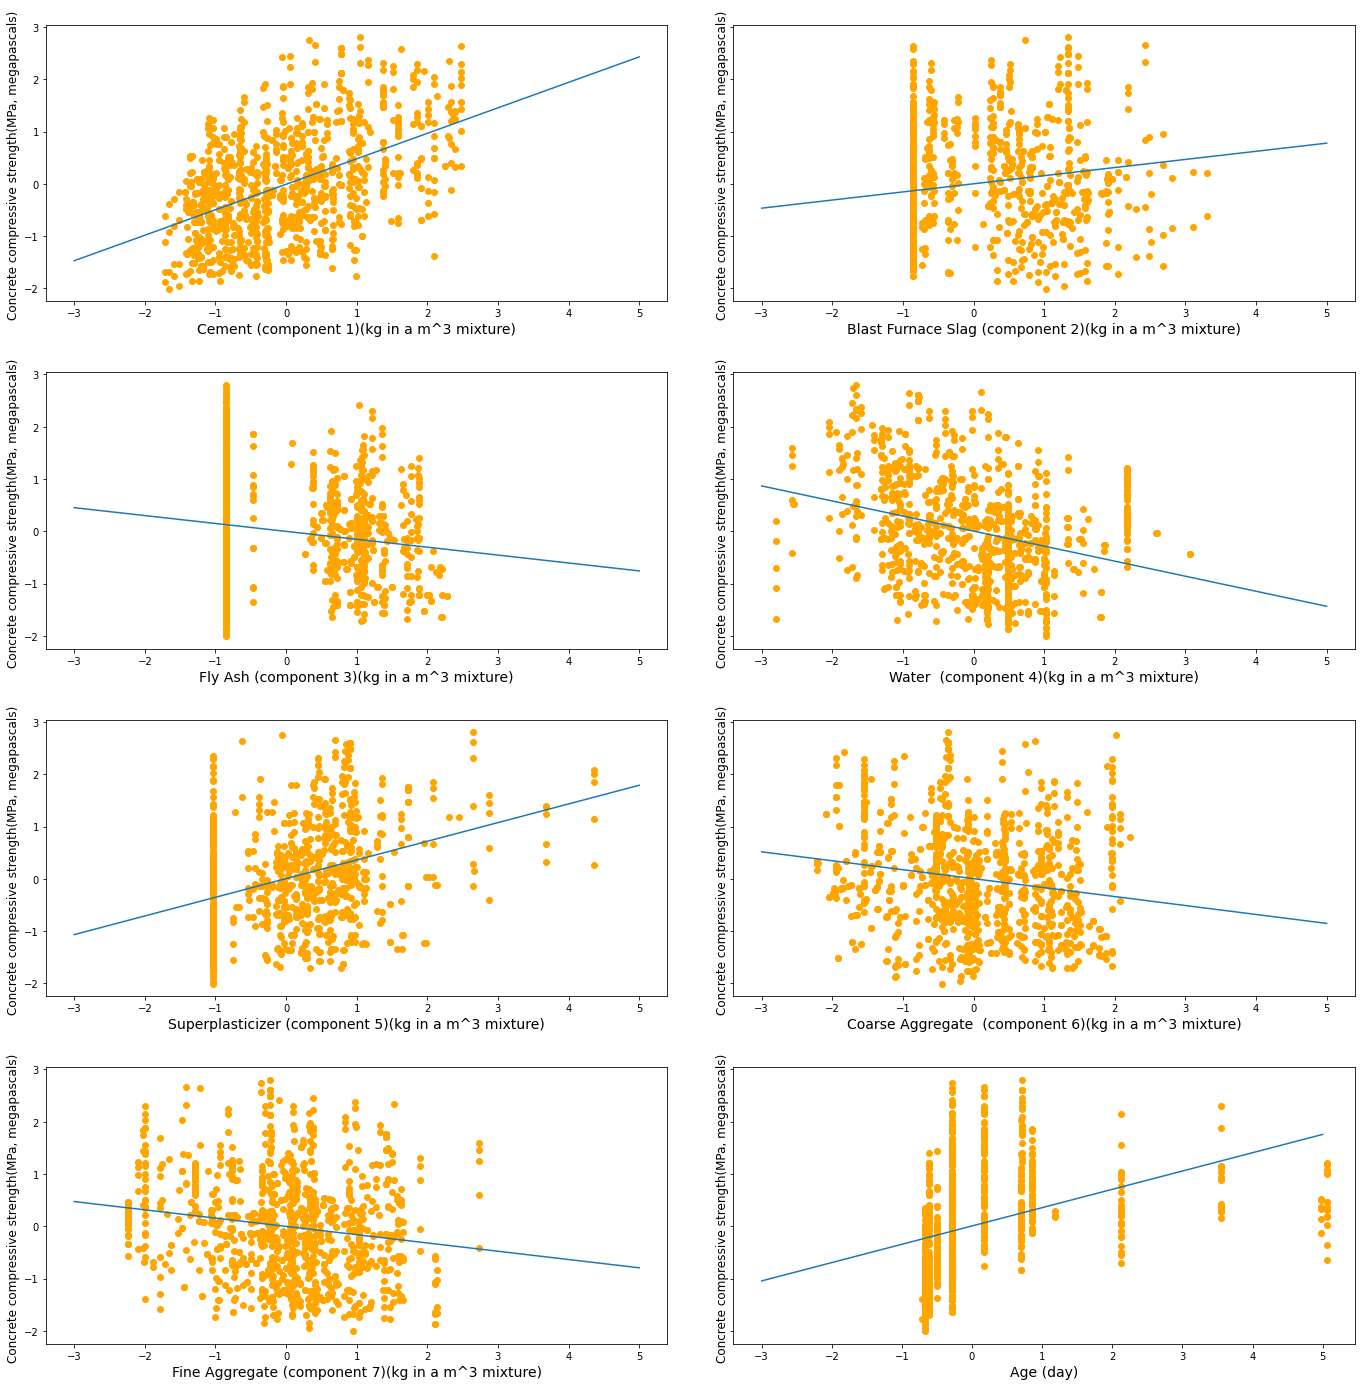

In [32]:
print(m_b_list)

fig, axes = plt.subplots(4, 2, sharey=True, figsize=(20,20))
fig.tight_layout(pad=5.0)

feature_list = standardized_dataframe.columns.values;
feature_index = 0

x = np.linspace(-3, 5, 100)

for i in range(4):
    for j in range(2):
        axes[i,j].scatter(standardized_dataframe[feature_list[feature_index]], standardized_dataframe[feature_list[8]], color='orange')
        axes[i,j].set_ylabel(feature_list[8], fontsize=12)
        axes[i,j].set_xlabel(feature_list[feature_index], fontsize=14)

        y = m_b_list[feature_index][0]*x + m_b_list[feature_index][1]
        axes[i,j].plot(x,y)
        feature_index+=1

plt.show()

# Multivariate Regression

### Functions

In [36]:
def multivariate_prediction_values(m_b_init_vector, train, feature_list):
    bias_column = pd.Series([m_b_init_vector[-1]]*len(train.index))
    prediction_column = bias_column
    for i in range(len(m_b_init_vector)-1):
        prediction_column += m_b_init_vector[i]*train[feature_list[i]]
    return prediction_column


Raw Data

In [37]:
train, test = train_test_split(initial_dataframe, test_size=0.4, random_state=42, shuffle=True)

In [38]:
# Set hyperparameters
max_num_steps = 3000
mse_threshold = 0.01
alpha = 0.000001

# Set the initial vector of coefficients
m_b_init_vector = [1,2,3,4,5,6,7,8,9]

# Get a list of the feature column names
feature_list = initial_dataframe.columns.values;

# Run gradient descent for max_num_steps iterations
for i in range(max_num_steps):
    
    # Calculate the predicted labels for the training set
    predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)
    
    # Get the actual labels for the training set
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

    # Calculate the mean squared error (MSE) between the predicted and actual labels
    mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
    
    # If the MSE is below the threshold, stop gradient descent
    if mse_value < mse_threshold:
        print("mse break")
        break

    # Update each coefficient using the gradient descent algorithm
    for j in range(len(m_b_init_vector)-1):
        m_b_init_vector[j] = gradient_m(m_b_init_vector[j], alpha, train[feature_list[j]], actual_labels_column, predicted_labels_column)
    m_b_init_vector[-1] = gradient_b(m_b_init_vector[-1],alpha, actual_labels_column, predicted_labels_column)

print(m_b_init_vector)

# Calculate the predicted labels for the training set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)

# Get the actual labels for the training set
actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MSE between the predicted and actual training set labels
mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)

# Calculate the R-squared value between the predicted and actual training set labels
r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Training R-squared:", r_squared)

# Calculate the predicted labels for the test set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, test, feature_list)

# Get the actual labels for the test set
actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MSE between the predicted and actual test set labels
mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
# Calculate the R-squared value between the predicted and actual test set labels
r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Testing R-squared:", r_squared)


[-0.06512546067792524, -0.02204496349864563, -0.07562278602465877, 0.7271098873839683, 4.870789963794541, -0.057062180438292066, -0.06812143352978106, 0.02344173113540761, 8.988612339297744]
Training R-squared: 0.46274347121407133
Testing R-squared: 0.43829605722209053


Pre-processed Data

In [39]:
train, test = train_test_split(standardized_dataframe, test_size=0.5, random_state=42, shuffle=True)

In [40]:
# Set hyperparameters
max_num_steps = 300
mse_threshold = 0.01
alpha = 0.25

# Set the initial vector of coefficients
m_b_init_vector = [1,2,3,4,5,6,7,8,9]

# Get a list of the feature column names
feature_list = standardized_dataframe.columns.values;

# Run gradient descent for max_num_steps iterations
for i in range(max_num_steps):
    
    # Calculate the predicted labels for the training set
    predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)
    
    # Get the actual labels for the training set
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

    # Calculate the mean squared error (MSE) between the predicted and actual labels
    mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
    
    # If the MSE is below the threshold, stop gradient descent
    if mse_value < mse_threshold:
        print("mse break")
        break

    # Update each coefficient using the gradient descent algorithm
    for j in range(len(m_b_init_vector)-1):
        m_b_init_vector[j] = gradient_m(m_b_init_vector[j], alpha, train[feature_list[j]], actual_labels_column, predicted_labels_column)
    m_b_init_vector[-1] = gradient_b(m_b_init_vector[-1],alpha, actual_labels_column, predicted_labels_column)

print(m_b_init_vector)

# Calculate the predicted labels for the training set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)

# Get the actual labels for the training set
actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MSE between the predicted and actual training set labels
mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)

# Calculate the R-squared value between the predicted and actual training set labels
r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Training R-squared:", r_squared)

# Calculate the predicted labels for the test set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, test, feature_list)

# Get the actual labels for the test set
actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MSE between the predicted and actual test set labels
mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
# Calculate the R-squared value between the predicted and actual test set labels
r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Testing R-squared:", r_squared)


[1.165963195067791, 1.0275592765731756, 0.6069029606531458, 0.14748671884263267, 0.12378858780259512, 0.5164927669944218, 0.51034299862467, 0.5404965124406994, 0.061549726793957406]
Training R-squared: 0.8504414185293282
Testing R-squared: 0.8050423601215002


### MAE as Loss Function

In [43]:
# Set hyperparameters
max_num_steps = 300
mae_threshold = 0.01
alpha = 0.25

# Set the initial vector of coefficients
m_b_init_vector = [1,2,3,4,5,6,7,8,9]

# Get a list of the feature column names
feature_list = standardized_dataframe.columns.values;

# Run gradient descent for max_num_steps iterations
for i in range(max_num_steps):
    
    # Calculate the predicted labels for the training set
    predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)
    
    # Get the actual labels for the training set
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

    # Calculate the mean squared error (MSE) between the predicted and actual labels
    mae_value = loss_function_mae(predicted_labels_column, actual_labels_column)
    
    # If the MSE is below the threshold, stop gradient descent
    if mae_value < mae_threshold:
        print("mae break")
        break

    # Update each coefficient using the gradient descent algorithm
    for j in range(len(m_b_init_vector)-1):
        m_b_init_vector[j] = gradient_m(m_b_init_vector[j], alpha, train[feature_list[j]], actual_labels_column, predicted_labels_column)
    m_b_init_vector[-1] = gradient_b(m_b_init_vector[-1],alpha, actual_labels_column, predicted_labels_column)

print(m_b_init_vector)

# Calculate the predicted labels for the test set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)

# Get the actual labels for the test set
actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MAE between the predicted and actual test set labels
mae_value = loss_function_mae(predicted_labels_column, actual_labels_column)
# Calculate the R-squared value between the predicted and actual test set labels
r_squared = mse_to_rsquared(loss_function_mae(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Training R-squared:", r_squared)


# Calculate the predicted labels for the test set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, test, feature_list)

# Get the actual labels for the test set
actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MAE between the predicted and actual test set labels
mae_value = loss_function_mae(predicted_labels_column, actual_labels_column)
# Calculate the R-squared value between the predicted and actual test set labels
r_squared = mse_to_rsquared(loss_function_mae(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Testing R-squared:", r_squared)

[1.165963195067791, 1.0275592765731756, 0.6069029606531458, 0.14748671884263267, 0.12378858780259512, 0.5164927669944218, 0.51034299862467, 0.5404965124406994, 0.061549726793957406]
Training R-squared: 0.8279405919073648
Testing R-squared: 0.8039893501007722


### Ridge Regression

In [44]:
def l2_norm(m_b_init_vector):
    m_b_init_vector = pd.Series(m_b_init_vector)
    return (m_b_init_vector**2).sum()

In [51]:
# Set hyperparameters
max_num_steps = 1000
mse_threshold = 0.0001
alpha = 0.01
# Ridge Regression Hyperparameter
ridge = 0.0005

# Set the initial vector of coefficients
m_b_init_vector = [1,1,1,1,1,1,1,1,1]

# Get a list of the feature column names
feature_list = standardized_dataframe.columns.values;

mse_values_over_iter = []

# Run gradient descent for max_num_steps iterations
for i in range(max_num_steps):
    
    # Calculate the predicted labels for the training set
    predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list) + ridge*l2_norm(m_b_init_vector)
    
    # Get the actual labels for the training set
    actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

    # Calculate the mean squared error (MSE) between the predicted and actual labels
    mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
    mse_values_over_iter.append(mse_value)
    
    # If the MSE is below the threshold, stop gradient descent
    if mse_value < mse_threshold:
        print("mae break")
        break

    # Update each coefficient using the gradient descent algorithm
    for j in range(len(m_b_init_vector)-1):
        m_b_init_vector[j] = gradient_m(m_b_init_vector[j], alpha, train[feature_list[j]], actual_labels_column, predicted_labels_column)
    m_b_init_vector[-1] = gradient_b(m_b_init_vector[-1],alpha, actual_labels_column, predicted_labels_column)

print(m_b_init_vector)

# Calculate the predicted labels for the training set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, train, feature_list)

# Get the actual labels for the training set
actual_labels_column = train['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MSE between the predicted and actual test set labels
mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
# Calculate the R-squared value between the predicted and actual test set labels
r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Training R-squared:", r_squared)

# Calculate the predicted labels for the test set using the final coefficients
predicted_labels_column = multivariate_prediction_values(m_b_init_vector, test, feature_list)

# Get the actual labels for the test set
actual_labels_column = test['Concrete compressive strength(MPa, megapascals) ']

# Calculate the MSE between the predicted and actual test set labels
mse_value = loss_function_mse(predicted_labels_column, actual_labels_column)
# Calculate the R-squared value between the predicted and actual test set labels
r_squared = mse_to_rsquared(loss_function_mse(predicted_labels_column, actual_labels_column), actual_labels_column)
print("Testing R-squared:", r_squared)

[1.2391556791805287, 1.098400570665958, 0.6700489519260062, 0.3594360748650105, 0.29119712218597804, 0.6364176160661202, 0.6204450975942991, 0.5305676116062426, 0.032779677206769504]
Training R-squared: 0.8425780233372892
Testing R-squared: 0.7894955094258154


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabel'

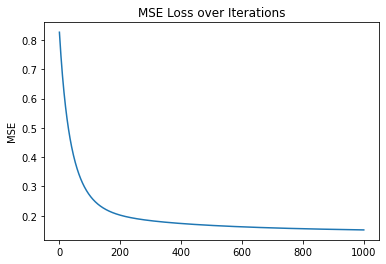

In [65]:
x = np.linspace(0, 1000, 1000)
plt.plot(x, mse_values_over_iter)
plt.title('MSE Loss over Iterations')
plt.ylabel('MSE')
plt.xlabel('MSE')